# Seaborn

## 0. Введение

[Seaborn](https://seaborn.pydata.org/) — популярная библиотека готовых шаблонов для статистической визуализации, написанная на бэкенде `matplotlib`.  
Две основные причины не проходить мимо:
1. Выразительный высокоуровневый интерфейс: построение большинства простых графиков происходит в одну строчку кода.
2. Более эстетичные графики: часто встроенные в `seaborn` стили достаточно хороши и без вашего вмешательства.

Автор seaborn — [Michael Waskom, PhD](https://www.cns.nyu.edu/~mwaskom/), сотрудник [Center for Neural Research](https://www.cns.nyu.edu/home.php) (Нью-Йорк), выпускник Стэнфорда.  
Разработка seaborn это его хобби, которое делает жизни тысяч людей чуть лучше.

**Малоизвестный факт:** библиотека названа в честь [Сэмюела Нормана Сиборна](https://en.wikipedia.org/wiki/Sam_Seaborn) (S.N.S. — именно поэтому `import seaborn as sns`, героя сериала [The West Wing](https://en.wikipedia.org/wiki/The_West_Wing), "один из самых важных телесериалов в истории по версии журнала Times". Таким образом автор отдал дань уважения любимому сериалу. [Доказательство](https://github.com/mwaskom/seaborn/issues/229) можно найти среди issues в репозитории проекта.

In [1]:
import warnings

import numpy as np
import pandas as pd
import scipy.stats as sps

import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

warnings.simplefilter("ignore", FutureWarning)
warnings.simplefilter("ignore", mpl.MatplotlibDeprecationWarning)
warnings.simplefilter("ignore", UserWarning)

Начнём с простого: рассмотрим отрисовку нескольких траекторий синусов при помощи matplotlib и улучшим её с помощью seaborn.

In [2]:
def sinplot(flip=1):
    x = np.linspace(0, 14, 100)
    for i in range(1, 7):
        plt.plot(x, np.sin(x + i * .5) * (7 - i) * flip)

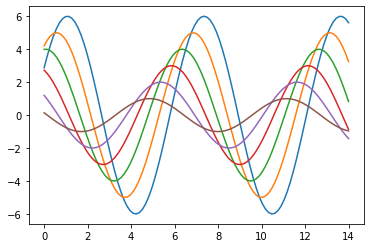

In [3]:
sinplot()

## 1. Основные параметры

### 1.1. Стили

Установка эстетических параметров графиков:

`sns.set(context='notebook', style='darkgrid', palette='deep', font='sans-serif', font_scale=1, color_codes=False, rc=None)`

* `context` -- параметры контекста, влияет на размер меток, линий и других элементов, но не на общий стиль. Контекст: `notebook`, `paper`, `talk`, `poster`;
* `style` -- стиль осей: `darkgrid` (серый фон с сеткой), `whitegrid` (белый фон с сеткой), `dark` (серый фон без сетки), `white`  (белый фон без сетки), `ticks`;
* `palette` -- цветовая палитра: `deep`, `muted`, `bright`, `pastel`, `dark`, `colorblind`, а так же палитры из `matplotlib`;
* `font` -- шрифт текста;
* `font_scale` -- масштабирование размера текста.

Посмотрим вид графиков для разных контекстов:

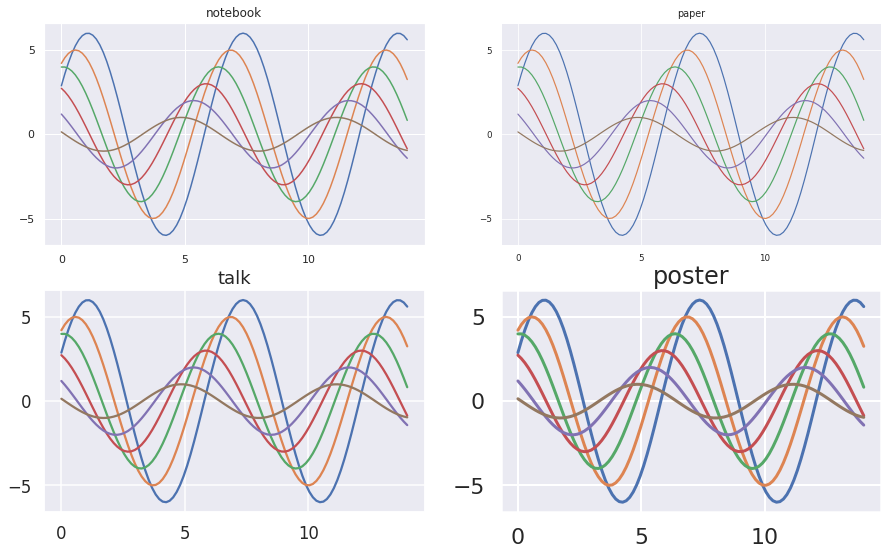

In [4]:
plt.figure(figsize=(15, 9))
for i, context in enumerate(['notebook', 'paper', 
                             'talk', 'poster']):
    sns.set(context=context)
    plt.subplot(2, 2, i+1)
    sinplot()
    plt.title(context)

Вид графиков в разных стилях

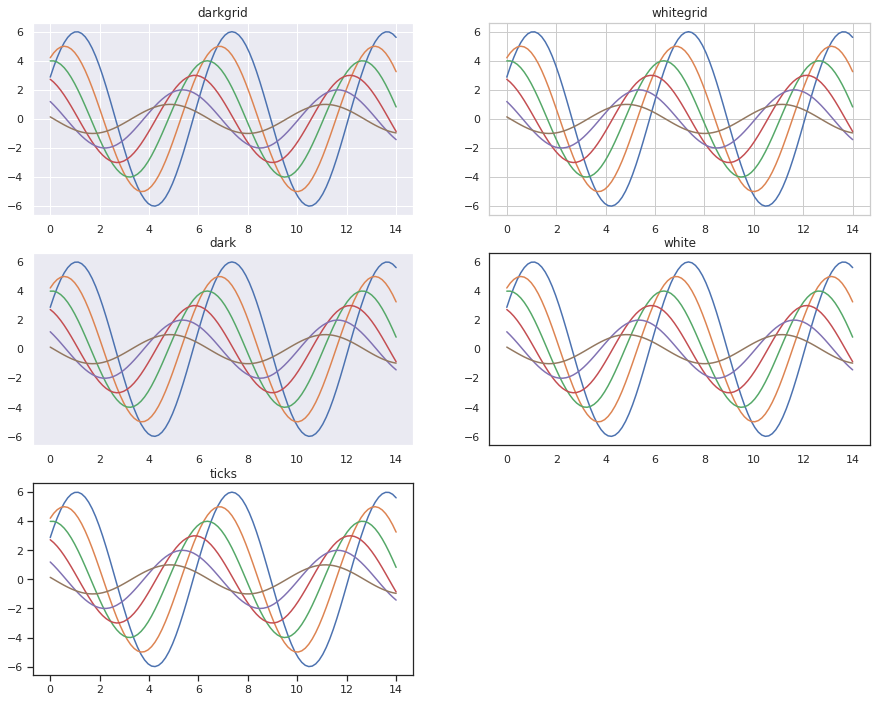

In [5]:
plt.figure(figsize=(15, 12))
for i, style in enumerate(['darkgrid', 'whitegrid', 
                           'dark', 'white', 'ticks']):
    sns.set(style=style)
    plt.subplot(3, 2, i+1)
    sinplot()
    plt.title(style)

В seaborn можно убрать рамку вокруг картинки, причём любую из четырёх сторон. 
В matplotlib это [нетривиально](https://stackoverflow.com/questions/14908576/how-to-remove-frame-from-matplotlib-pyplot-figure-vs-matplotlib-figure-frame).

`sns.despine(fig=None, ax=None, top=True, right=True, left=False, bottom=False, offset=None, trim=False)`
* `fig` -- фигура `matplotlib`. Если `None`, то текущая;
* `top`, `right`, `left`, `bottom` -- указатели границ. Левую и нижнюю оставляют, т.к. вдоль них расположены метки на координатных осях.

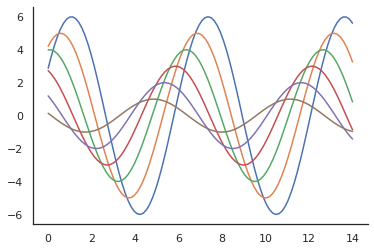

In [6]:
sns.set(style='white')
sinplot()
sns.despine()

Большой недостаток подхода выше — использование `sns.set`.  
Дело в том, что эта функция меняет глобальные переменные: все последующие графики отрисовываются в том же стиле.  
Иногда это уместно: можно один раз вызвать `sns.set` в самом начале ноутбука и получить стилизованные графики с минимумом усилий. Во всех остальных ситуациях нужно использовать контекстные менеджеры `sns.plotting_context` и `sns.axes_style` вместо `sns.set`.

In [7]:
sns.set()

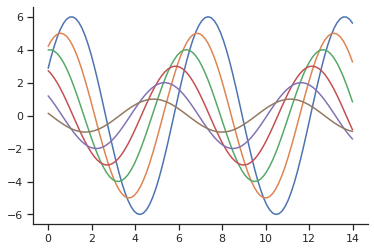

In [8]:
with sns.plotting_context("notebook"), sns.axes_style("ticks"):
    sinplot()
    sns.despine()

### 1.2. Цвета

Используемую палитру можно визуализировать с помощью функции `sns.palplot`.  
Палитры делятся на несколько типов: 

#### Последовательные (sequential)

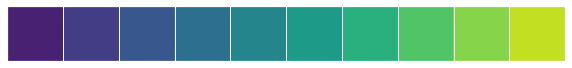

In [9]:
sns.palplot(sns.color_palette('viridis', n_colors=10))

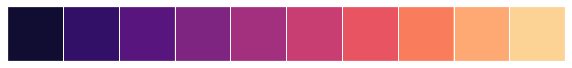

In [10]:
sns.palplot(sns.color_palette('magma', n_colors=10))

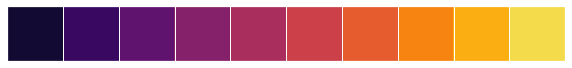

In [11]:
sns.palplot(sns.color_palette('inferno', n_colors=10))

Здесь стоит сделать отступление, т.к. именно с этим типом палитр люди сталкиваются чаще всего. Стандартные последовательные палитры в seaborn — `viridis`, `inferno`, `magma` и другие — хороши плавным изменением интенсивности цвета. Они не искажают восприятие и подходят в том числе для дальтоников. О том, как индустрия пришла к своим палитрам, можно узнать в [видеолекции с SciPy 2015](https://www.youtube.com/watch?list=PLYx7XA2nY5Gcpabmu61kKcToLz0FapmHu&v=xAoljeRJ3lU) — ежегодной всемирной конференции энтузиастов библиотеки `scipy`. 

#### Расходящиеся (diverging)

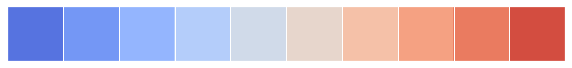

In [12]:
sns.palplot(sns.color_palette('coolwarm', n_colors=10))

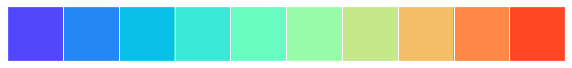

In [13]:
sns.palplot(sns.color_palette('rainbow', n_colors=10))

В прошлом большой популярностью пользовалась палитра `jet`, очень похожая на `rainbow`. Более того, долгое время это была палитра по умолчанию в matplotlib. Тем не менее, от `jet` отказались: выяснилось, что она искажает восприятие картинки из-за неравномерной интенсивности отдельных цветов палитры. Есть [интересная статья](https://jakevdp.github.io/blog/2014/10/16/how-bad-is-your-colormap/), в которой подробно поясняются причины такого решения.

Забавный факт: даже если просто попытаться отрисовать её, seaborn скажет безапеляционное "Нет". 

In [14]:
'''
sns.palplot(sns.color_palette('jet', n_colors=10))'''

"\nsns.palplot(sns.color_palette('jet', n_colors=10))"

#### Категориальные (qualitative)

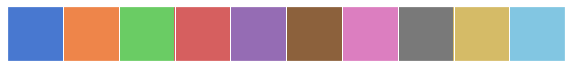

In [15]:
sns.palplot(sns.color_palette('muted', n_colors=10))

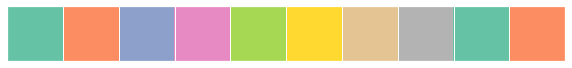

In [16]:
sns.palplot(sns.color_palette('Set2', n_colors=10))

#### Пользовательские

В seaborn можно сделать свою палитру: либо на основании имеющихся, либо совсем с нуля.  
Для примера, сделаем палитру из десяти оттенков оранжевого

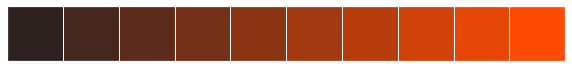

In [17]:
sns.palplot(sns.dark_palette("xkcd:blood orange", n_colors=10))

Внимательный читатель обратит внимание на странный формат цвета. В 2010 году популярный онлайн-комикс [xkcd](https://xkcd.com/) провёл [соцопрос](https://blog.xkcd.com/2010/05/03/color-survey-results/), по результатам которого подобрал названия для [954 самых используемых RGB-цветов](https://xkcd.com/color/rgb/). Это упрощает жизнь огромному количеству людей, от дизайнеров до аналитиков и учёных. 


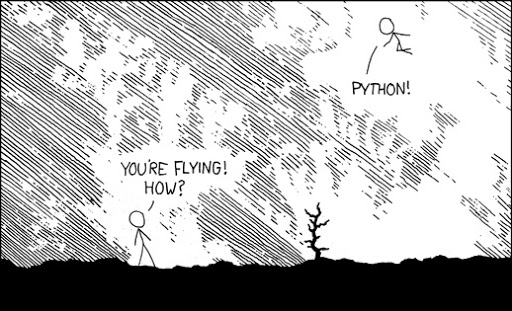


**Бонус:** нарисуем радугу с помощью группы линий

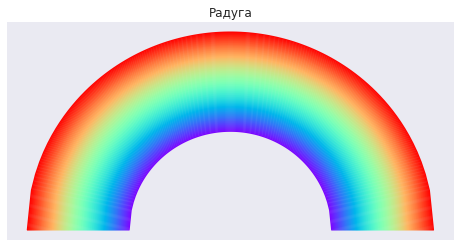

In [18]:
count = 100
colors = sns.color_palette('rainbow', count)
layers = np.linspace(1, 2, count)

plt.figure(figsize=(8, 4))
plt.title("Радуга")
for i in np.arange(count):
    grid = np.linspace(-layers[i], layers[i], 100)
    y = np.sqrt(layers[i]**2 - grid**2)
    sns.lineplot(grid, y, c=colors[i])
plt.xticks([]);
plt.yticks([]);
sns.despine(left=True, bottom=True);

Больше о палитрах можно прочитать в [официальной документации](https://seaborn.pydata.org/tutorial/color_palettes.html).

---

Теперь можно перейти и к более практичным примерам.  
Рассмотрим основные типы графиков, с которыми люди сталкиваются при анализе данных.

## 2. Оценки плотности

Пусть $X = (X_1, ..., X_n)$ --- выборка из непрерывного распределения. 
Выберем
* $q(x)$ --- некоторая "базовая" плотность, называемая **ядром**. Чаще всего в качестве ядра рассматривают плотность нормального распределения $\mathcal{N}(0, I_n)$. 
* $h > 0$ --- величина, отвечающая за масштабирование ядра, называемая **шириной ядра**.

Тогда **ядерной оценкой плотности** (kernel density estimation, KDE) по выборке $X$ называется плотность
$$\widehat{p}_h(x) = \frac{1}{nh}\sum_{i=1}^n q\left(\frac{x-X_i}{h}\right)$$

**Смысл:** в каждую точку выборки поставили отмасштабированное ядро так, будто эта точка — центр ядра, а затем усреднили значения соседних точек с весами, заданными этим ядром. Вместо тысячи слов — [интерактивная иллюстрация](https://mathisonian.github.io/kde/).

![image.png](attachment:image.png)

Ядерные оценки плотности — KDE, Kernel Density Estimates — способ что-то понять о распределении, когда неизвестно ничего. Такого рода методы называют **непараметрическими**, они иллюстрируют разницу подходов в статистике и теории вероятностей: если в теории вероятности известно распределение и исследуются его свойства, то в статистике зачастую известны только данные, и по их свойствам угадывается распределение.

--------------------

### 2.1 `sns.kdeplot`

Построение и отрисовка KDE (в 1D или 2D):

`sns.kdeplot(data, data2=None, shade=False, vertical=False, kernel='gau', bw='scott', gridsize=100, cut=3, clip=None, legend=True, cumulative=False, shade_lowest=True, cbar=False, cbar_ax=None, cbar_kws=None, ax=None, **kwargs)`

* `data` -- выборка;
* `data2` -- вторая координата в двумерном случае;
* `shade` -- закрашивать ли области. В 1D закрашивает область под графиком, в 2D закрашивает области между линиями уровня;
* `vertical` -- повернуть график;
* `kernel` -- метка ядра. В 1D доступны `gau`, `cos`, `biw`, `epa`, `tri`, `triw`; в 2D только гауссовское;
* `bw` -- ширина ядра. Можно указать `scott`, `silverman` или число. В 2D можно указать пару чисел.
* `gridsize` -- размер сетки для отрисовки графика. Влияет только на точность отрисовки, а не на точность оценки плотности;
* `cut` -- задает границы отрисовки kde: график будет нарисован на величину cut * bw от крайних точек выборки
* `clip` -- нижняя и верхняя граница точек, по которым строится kde. Параметр имеет вид `(low, high)` в 1D и `((low_x, high_x), (low_y, high_y))` в 2D;
* `legend` -- отрисовка легенды;
* `cumulative` -- если `True`, то рисует функцию распределения, соответствующую построенной KDE;
* `shade_lowest` -- нужно ли закрашивать последний контур для 2D. Флаг `False` может быть полезен при отрисовке нескольких kde на одном графике
* `cbar` -- в 2D добавляет colorbar (шкала цветов);
* `cbar_kws` -- аргументы, соответствующие `fig.colorbar`;
* `kwargs` -- другие аргументы, соответствующие `plt.plot` или `plt.contour`. Например, `color` -- цвет, `cmap` -- цветовая схема, `n_levels` -- количество линий уровня.

### 2.2 `sns.distplot`

Гибко настраиваемый график оценки одномерного распределения по выборке.
Совмещает возможности функций `plt.hist`, `sns.kdeplot`, `sns.rugplot` и функций `fit` из `scipy.stats`.

`sns.distplot(a, bins=None, hist=True, kde=True, rug=False, fit=None, hist_kws=None, kde_kws=None, rug_kws=None, fit_kws=None, color=None, vertical=False, norm_hist=False, axlabel=None, label=None, ax=None)`

* `a` -- выборка;
* `bins` -- число бинов гистограммы. Если `None`, то выставляется по правилу Freedman-Diaconis;
* `hist` -- рисовать ли гистограмму;
* `kde` -- рисовать ли kde;
* `rug` -- рисовать ли точки выборки в виде штрихов;
* `hist_kws`, `kde_kws`, `rug_kws` -- параметры гистограммы, kde и rugplot в виде словарей
* `fit` -- семейство распредений. Объект должен иметь метод `fit`, который вернет ОМП в виде `tuple`, и метод `pdf`, который по сетке посчитает плотность распределения с параметрами, соответствующими ОПМ. Например, подойдет распределение из `scipy.stats`. Если параметр указан, что будет нарисована плотность, соответствующая ОМП в данном классе;
* `color` -- цвет;
* `vertical` -- повернуть график;
* `norm_hist` -- нормировать ли гистограмму.

------------------

Пример `distplot` для всех четырех типов графиков для выборки из нормального распределения. В качестве параметрического семейства распределений использованы все нормальные распределения. Плотность, соответствующая ОМП, нарисована черным цветом.

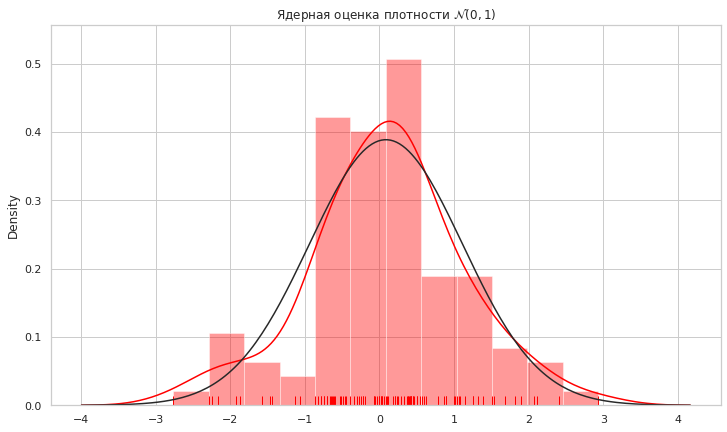

In [19]:
x = sps.norm.rvs(size=100)
with sns.plotting_context(font_scale=1.5), sns.axes_style('whitegrid'):
    plt.figure(figsize=(12, 7))
    plt.title(r"Ядерная оценка плотности $\mathcal{N}(0, 1)$")
    sns.distplot(x, rug=True, fit=sps.norm, color='red');

Многомерная оценка плотности

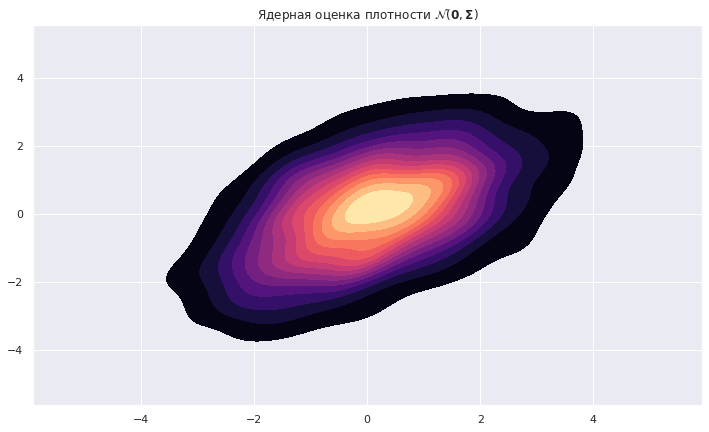

In [20]:
x, y = sps.multivariate_normal(cov=[[2, 1], [1, 2]]).rvs(size=1000).T
plt.figure(figsize=(12, 7))
plt.title(
    r"Ядерная оценка плотности $\mathcal{N}(\mathbf{0}, \mathbf{\Sigma})$"
)
sns.kdeplot(x, y, n_levels=15, shade=True, cmap="magma");

#### Ирисы Фишера

Теперь более интересный пример. Загрузим датасет Ирисы Фишера — [классический учебный датасет](https://en.wikipedia.org/wiki/Iris_flower_data_set), который встроен в seaborn. Числовые столбцы отвечают за длину и ширину наружной и внутренней доли околоцветника для трех сортов ириса: setosa, virginica, versicolor.

![image.png](attachment:image.png)

In [21]:
iris = sns.load_dataset('iris')
iris.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [22]:
setosa = iris.loc[iris.species == 'setosa']
virginica = iris.loc[iris.species == 'virginica']
versicolor = iris.loc[iris.species == "versicolor"]

Построим для них ядерную оценку плотности

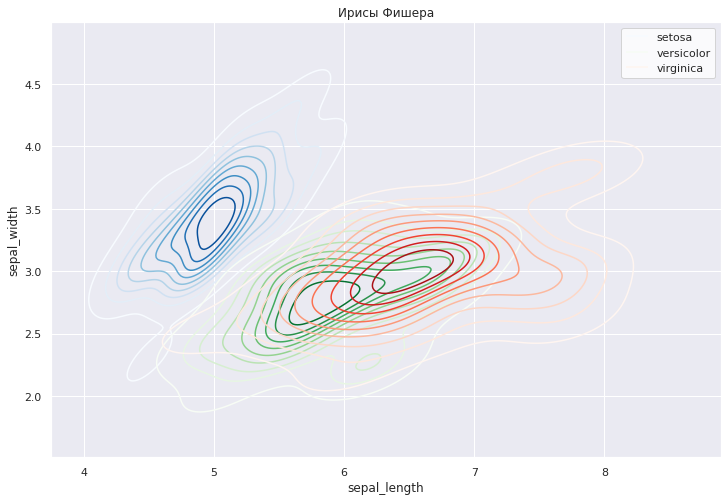

In [23]:
plt.figure(figsize=(12, 8))
with sns.axes_style("darkgrid"):
    ax = sns.kdeplot(setosa.sepal_length, setosa.sepal_width, 
                     label="setosa", cmap='Blues')
    ax = sns.kdeplot(versicolor.sepal_length, versicolor.sepal_width, 
                     label="versicolor", cmap='Greens')
    ax = sns.kdeplot(virginica.sepal_length, virginica.sepal_width, 
                     label="virginica", cmap='Reds')
    ax.set_title("Ирисы Фишера");
    ax.legend().get_frame().set_facecolor("white");

Обратите внимание на то, как отрисована легенда! Если не выставить цвет фона вручную, она будет серой, что неэстетично.

---

Грамотный исследовательский анализ данных — Exploratory Data Analysis, EDA — это залог правильного выбора модели машинного обучения. По графику видно, что два вида в этом признаковом пространстве разделяются прямой линией. Т.е. вид цветка можно определить по значениям признаков `sepal_width` и `sepal_length`.  

Значит, для классификации цветков можно использовать т.н. *обобщённо-линейные модели* — а именно, т.н. *логистическую регрессию*. Что это такое и какие ещё есть подходы к задаче классификации вам расскажут на третьем курсе.

## 3. Box plot 

![image.png](attachment:image.png)

Box plot --- график, использующийся в описательной статистике, компактно изображающий одномерное распределение вероятностей.

Такой вид диаграммы в удобной форме показывает медиану (или, если нужно, среднее), нижний и верхний квартили, минимальное и максимальное значение выборки и выбросы. Несколько таких ящиков можно нарисовать бок о бок, чтобы визуально сравнивать одно распределение с другим; их можно располагать как горизонтально, так и вертикально. Расстояния между различными частями ящика позволяют определить степень разброса (дисперсии) и асимметрии данных и выявить выбросы.

`seaborn.boxplot(x=None, y=None, hue=None, data=None, order=None, hue_order=None, orient=None, color=None, palette=None, saturation=0.75, width=0.8, dodge=True, fliersize=5, linewidth=None, whis=1.5, notch=False, ax=None, **kwargs)`

* `x`, `y`, `hue` -- одномерные данные или имена переменных из `data`. Параметр `hue` отвечает за категории данных;
* `data` -- данные;
* `orient`: `"v"` | `"h"` -- ориентация (вертикальная или горизонтальая);
* `color` и `palette` -- задают цвет.

-------------

Простой пример:

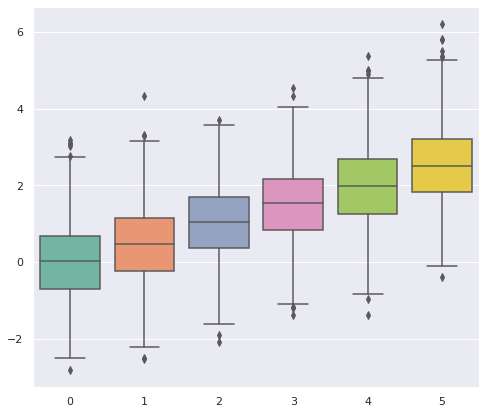

In [24]:
data = sps.norm.rvs(size=(1000, 6)) + np.arange(6) / 2

plt.figure(figsize=(8, 7))
sns.boxplot(data=data, palette='Set2');

Загрузим датасет `tips`, встроен в seaborn. Изначально датасет составлен официантом, который записывал информацию о каждых чаевых, который он получал в течение нескольких месяцев работы в ресторане. Имена переменных:
* `total_bill` -- общая сумма счета;
* `tip` -- сумма чаевых;
* `sex` -- пол клиента;
* `smoker` -- курящий ли клиент;
* `day` -- день недели (официант работал не все дни);
* `time` -- время дня;
* `size` -- количество людей в компании клиента.

In [25]:
tips = sns.load_dataset('tips')
tips.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


С помощью box plot визуализируем зависимость общей суммы счета от дня недели.

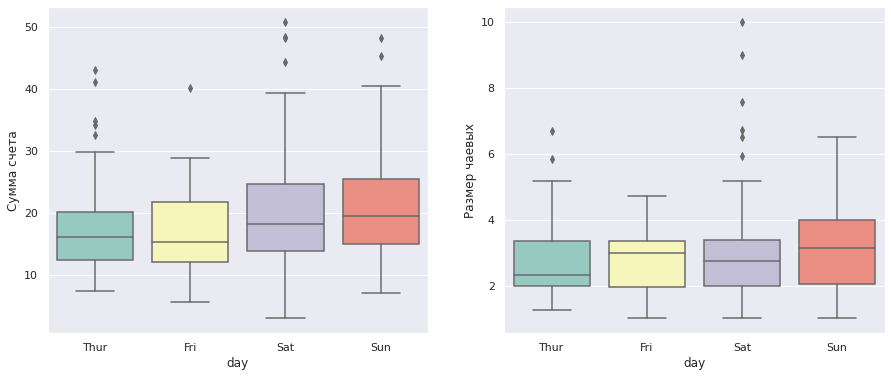

In [26]:
plt.figure(figsize=(15, 6))

plt.subplot(121)
sns.boxplot(x='day', y='total_bill', data=tips, palette='Set3')
plt.ylabel('Сумма счета')

plt.subplot(122)
sns.boxplot(x='day', y='tip', data=tips, palette='Set3')
plt.ylabel('Размер чаевых');

Посмотрим на ту же зависимость отдельно по двум группам, определяемых столбцом `smoker`, который передадим в аргумент `hue`. Для удобства сравнения результата между группами, их ящики рисуются рядом.

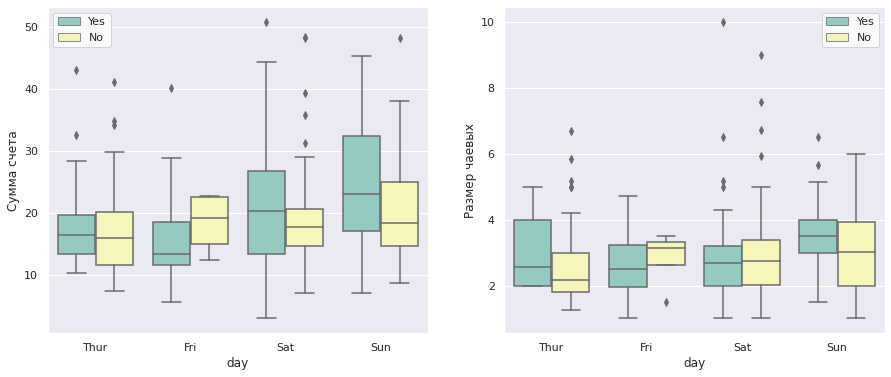

In [27]:
plt.figure(figsize=(15, 6))

plt.subplot(121)
ax = sns.boxplot(x='day', y='total_bill', hue='smoker', 
                 data=tips, palette='Set3')
ax.legend().get_frame().set_facecolor("white")
plt.ylabel('Сумма счета')

plt.subplot(122)
ax = sns.boxplot(x='day', y='tip', hue='smoker', 
            data=tips, palette='Set3')
ax.legend().get_frame().set_facecolor("white")
plt.ylabel('Размер чаевых');

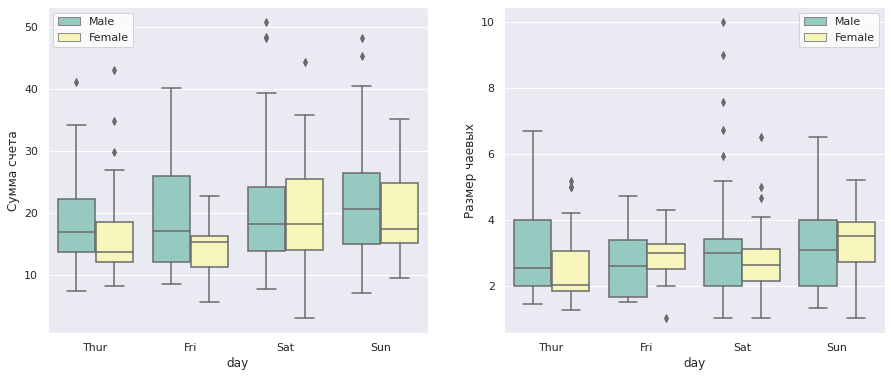

In [28]:
plt.figure(figsize=(15, 6))

plt.subplot(121)
ax = sns.boxplot(x='day', y='total_bill', hue='sex', 
                 data=tips, palette='Set3')
ax.legend().get_frame().set_facecolor("white")
plt.ylabel('Сумма счета')

plt.subplot(122)
ax = sns.boxplot(x='day', y='tip', hue='sex', 
            data=tips, palette='Set3')
ax.legend().get_frame().set_facecolor("white")
plt.ylabel('Размер чаевых');

## Отступление

Сравните два графика. Какой выглядит лучше?

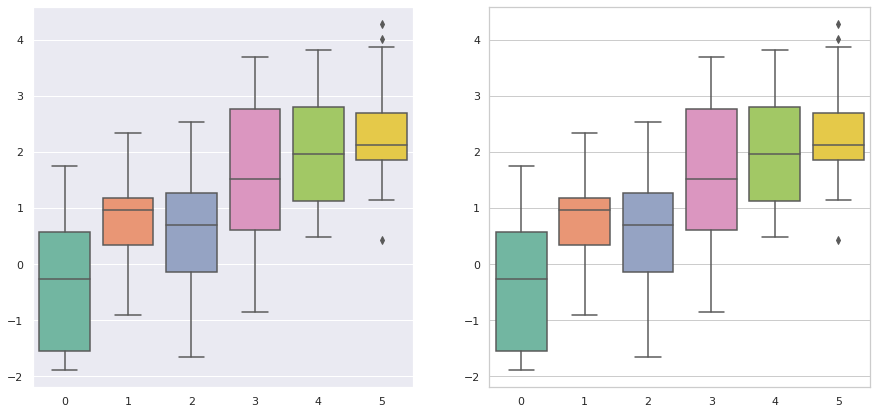

In [29]:
data = sps.norm.rvs(size=(20, 6)) + np.arange(6) / 2
plt.figure(figsize=(15, 7))

with sns.plotting_context(font_scale=1.5), sns.axes_style("darkgrid"):
    plt.subplot(121)
    sns.boxplot(data=data, palette='Set2')
    
with sns.plotting_context(font_scale=1.5), sns.axes_style("whitegrid"):
    plt.subplot(122)
    sns.boxplot(data=data, palette='Set2');

А из этих? В предположении, что необходима сетка, которая помогает при необходимости извлечения количественной информации из графика.

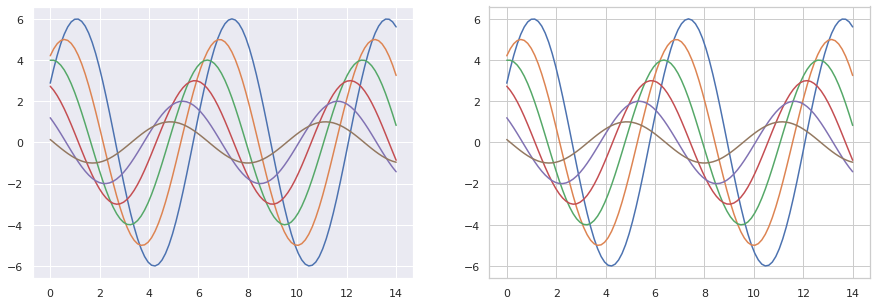

In [30]:
data = sps.norm.rvs(size=(20, 6)) + np.arange(6) / 2
plt.figure(figsize=(15, 5))

with sns.plotting_context(font_scale=1.5), sns.axes_style("darkgrid"):
    plt.subplot(121)
    sinplot()
    
with sns.plotting_context(font_scale=1.5), sns.axes_style("whitegrid"):
    plt.subplot(122)
    sinplot()

-------------

* Тему `darkgrid` стоит применять для "легких" графиков (точки, линии), поскольку белый цвет сетки на сером фоне помогает избежать конфликта сетки с линиями, представляющими данные. 
* Темы `white` и `whitegrid` похожи, но лучше подходят для графиков с "тяжелыми элементами" (например, закрашенные области).

-------------

## 4. Violin plot

Некоторая комбинация boxplot и ядерной оценки плотности. Внутри облака изображен обычный ящик с усами, только в сжатом виде и без выбросов. Форма облака соответствует ядерной оценке плотности.

`sns.violinplot(x=None, y=None, hue=None, data=None, order=None, hue_order=None, bw='scott', cut=2, scale='area', scale_hue=True, gridsize=100, width=0.8, inner='box', split=False, dodge=True, orient=None, linewidth=None, color=None, palette=None, saturation=0.75, ax=None, **kwargs)`

* `x`, `y`, `hue` -- одномерные данные или имена переменных из `data`;
* `data` -- данные;
* `bw` -- ширина ядра;
* `gridsize` -- размер сетки для отрисовки ядерной оценки плотности;
* `orient`: `"v"` | `"h"` -- ориентация (вертикальная или горизонтальая);
* `color` и `palette` -- задают цвет.

------------------

Простой пример

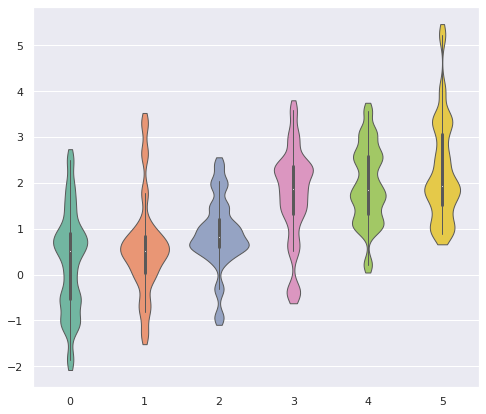

In [31]:
data = sps.norm.rvs(size=(20, 6)) + np.arange(6) / 2

plt.figure(figsize=(8, 7))
sns.violinplot(data=data, palette='Set2', bw=.2, cut=1, linewidth=1);

Более сложный пример: вместо двух boxplot-ов в примере с чаевыми можно постоить один сдвоенный violinplot

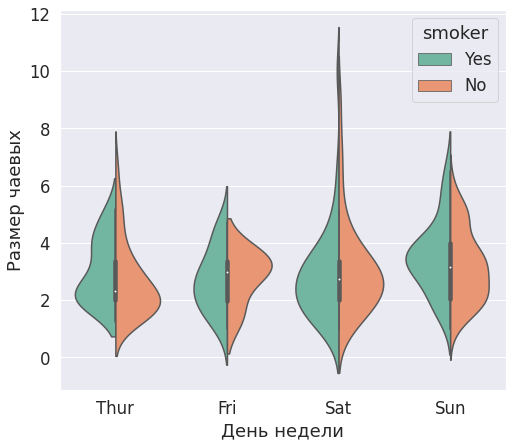

In [32]:
with sns.plotting_context("notebook", font_scale=1.5):
    plt.figure(figsize=(8, 7))
    sns.violinplot(x="day", y="tip", hue="smoker",
                   data=tips, palette="Set2", split=True);
    plt.ylabel('Размер чаевых');
    plt.xlabel('День недели');

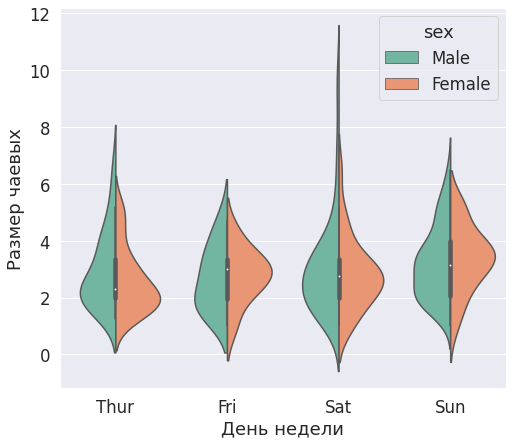

In [33]:
with sns.plotting_context("notebook", font_scale=1.5):
    plt.figure(figsize=(8, 7))
    sns.violinplot(x="day", y="tip", hue="sex",
                   data=tips, palette="Set2", split=True);
    plt.ylabel('Размер чаевых');
    plt.xlabel('День недели');

## 5. PairGrid

Сетка графиков для визуализации попарных отношений в данных.

`class sns.PairGrid(data, hue=None, hue_order=None, palette=None, hue_kws=None, vars=None, x_vars=None, y_vars=None, diag_sharey=True, size=2.5, aspect=1, despine=True, dropna=True)`

* `data` -- данные;
* `hue` -- категории, которые будут закрашиваться в разные цвета;
* `palette` -- цветовая схема, может быть задана в виде словаря цветов;
* `height` -- высота каждой грани (в дюймах).

Возвращает объект, у которого доступны перечисленные ниже функции. В эти функции нужно передать функцию `func`, с помощью которой будет построен график по паре переменных (или по одной на диагонали), а так же параметры этой функции.

* `map(func, **kwargs)` -- для каждой клетки применить `func`;
* `map_diag(func, **kwargs)` -- для каждой клетки *на диагонали* применить `func`;
* `map_offdiag(func, **kwargs)` -- для каждой клетки *вне диагонали* применить `func`;
* `map_lower(func, **kwargs)` -- для каждой клетки *под диагональю* применить `func`;
* `map_upper(func, **kwargs)` -- для каждой клетки *над диагональю* применить `func`.

-------------------

Визуализируем данные об ирисах Фишера. 
* на диагонали расположим одномерные ядерные оценки плотности;
* под диагональю -- двумерные;
* над диагональю изобразим сами точки.

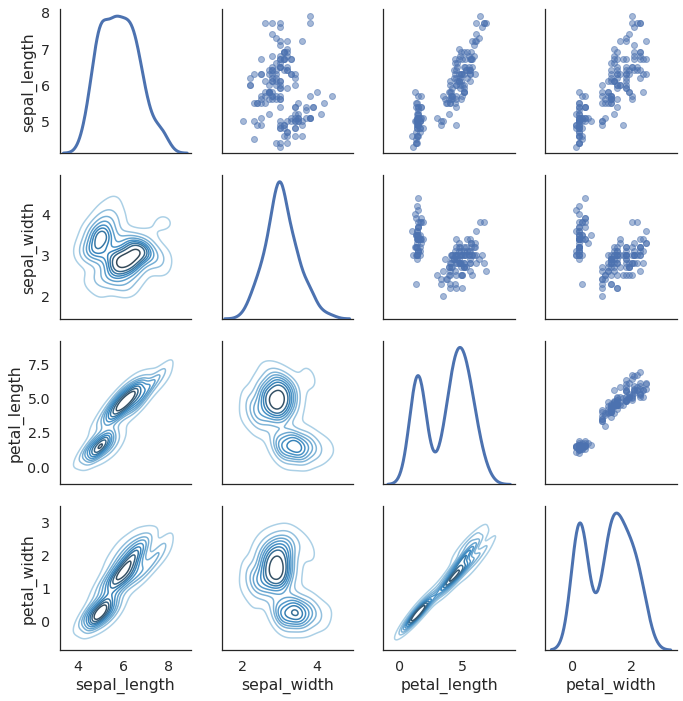

In [34]:
sns.set(style='white', font_scale=1.3)

df = sns.load_dataset('iris')

g = sns.PairGrid(df, diag_sharey=False)
g.map_lower(sns.kdeplot, cmap='Blues_d')
g.map_upper(plt.scatter, alpha=0.5)
g.map_diag(sns.kdeplot, lw=3);

Зададим классы с помощью параметра `hue`

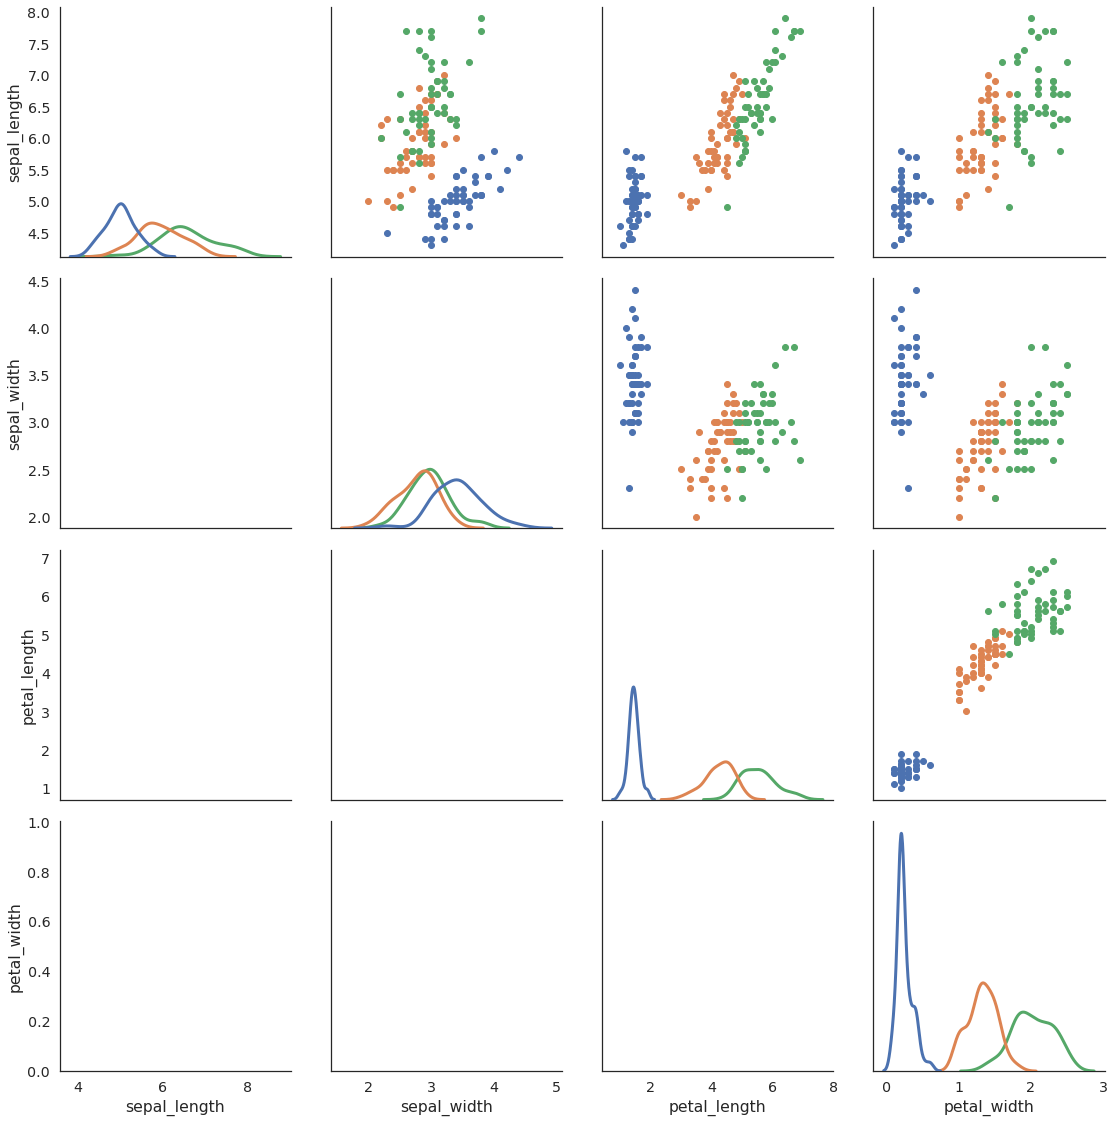

In [35]:
g = sns.PairGrid(df, hue='species', height=4)
#g.map_lower(sns.kdeplot, cmap='Blues_d')
g.map_upper(plt.scatter)
g.map_diag(sns.kdeplot, lw=3);

## 6. Heatmap

Визуализирует двумерную таблицу в виде тепловой карты.

`sns.heatmap(data, vmin=None, vmax=None, cmap=None, center=None, robust=False, annot=None, fmt='.2g', annot_kws=None, linewidths=0, linecolor='white', cbar=True, cbar_kws=None, cbar_ax=None, square=False, xticklabels='auto', yticklabels='auto', mask=None, ax=None, **kwargs)`

* `data` -- 2D-данные;
* `vmin` и `vmax` -- минимальное и максимальное значения цветов;
* `cmap` -- цветовая схема;
* `robust` -- если не указаны `vmin` и `vmax`, то не используются выбросы при определении минимума и максимума;
* `annot` -- в какие ячейки записывать данные;
* `fmt` -- формат записи данных;
* `linewidths` -- ширина линий между ячейками;
* `linecolor` -- цвет линий между ячейками;
* `cbar` -- рисовать ли colorbar.

Типичное применение — визуализация корреляции между признаками.

--------

Для примера загрузим данные о количестве пассажиров самолетов за каждый месяц с 1949 по 1960 года.

In [36]:
flights_long = sns.load_dataset('flights')
flights_long.head()

,year,month,passengers
0,1949,Jan,112
1,1949,Feb,118
2,1949,Mar,132
3,1949,Apr,129
4,1949,May,121


Двумерную таблицу меяц-год создадим с помощью `pivot_table`

In [37]:
flights = flights_long.pivot_table(index='month', 
                                   columns='year', 
                                   values='passengers')
flights

year,1949,1950,1951,1952,1953,1954,1955,1956,1957,1958,1959,1960
month,,,,,,,,,,,,
Jan,112,115,145,171,196,204,242,284,315,340,360,417
Feb,118,126,150,180,196,188,233,277,301,318,342,391
Mar,132,141,178,193,236,235,267,317,356,362,406,419
Apr,129,135,163,181,235,227,269,313,348,348,396,461
May,121,125,172,183,229,234,270,318,355,363,420,472
Jun,135,149,178,218,243,264,315,374,422,435,472,535
Jul,148,170,199,230,264,302,364,413,465,491,548,622
Aug,148,170,199,242,272,293,347,405,467,505,559,606
Sep,136,158,184,209,237,259,312,355,404,404,463,508


Визуализируем ее с помощью `heatmap`, что более наглядно, чем просто смотреть на числа в таблице выше.

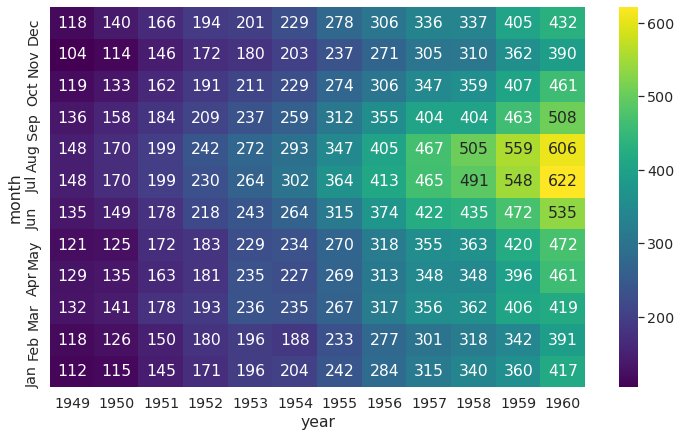

In [38]:
sns.set(font_scale=1.3)
f, ax = plt.subplots(figsize=(12, 7))
sns.heatmap(flights, annot=True, fmt='d', ax=ax, cmap="viridis")
plt.ylim((0, 12));

**Замечание:** `sns.heatmap` не умеет обрабатывать пропуски в данных! Если передать матрицу с пропусками, функция выкинет `TypeError`

In [39]:
sns.heatmap(np.array([1., np.nan], [3., 4.]))

TypeError: ignored

### 7. Clustermap

Аналог `sns.heatmap`, который автоматически группирует похожие строки и/или столбцы таблицы.  
Бывает очень полезно в тех случаях, когда нужно найти структуру в данных — скажем, разбить объекты на группы.  
Пример из медицинской практики — разделить клетки опухоли на **клональные линии** — клетки, получившиеся неконтролируемым делением одной родительской раковой клетки — на основании таблицы генетических мутаций, где каждой клетке — свой столбец.

`seaborn.clustermap(data, pivot_kws=None, method='average', metric='euclidean', z_score=None, standard_scale=None, figsize=(10, 10), cbar_kws=None, row_cluster=True, col_cluster=True, row_linkage=None, col_linkage=None, row_colors=None, col_colors=None, mask=None, dendrogram_ratio=0.2, colors_ratio=0.03, cbar_pos=(0.02, 0.8, 0.05, 0.18), tree_kws=None, **kwargs)`

У функции очень много технических параметров, так что рассмотрим только основные из тех, которых нет среди параметров heatmap:

* `data` -- 2D-данные;
* `row_cluster`, `col_cluster` — группировать ли строки или столбцы соотв-но;
* `row_colors`, `col_colors` — цветовые метки отдельных строк и столбцов (позволяет следить за их порядком);
* `method` -- метод группировки (см. документацию к [иерархической кластеризации в scipy](https://docs.scipy.org/doc/scipy/reference/generated/scipy.cluster.hierarchy.linkage.html));
* `mask` — позволяет указать, какие значения в таблице не показывать (по умолчанию скрываются только пропуски);
* `z_score` — привести ли все строки (если 0) или столбцы (если 1) к одному масштабу (`(x - mean(x)) / std(x)`);
* `standard_scale` — перевести ли все строки (если 0) или столбцы (если 1) в диапазон [0, 1] (`(x - min(x)) / (max(x) - min(x))`);

--------

Для примера загрузим встроенный в seaborn датасет `brain_networks`, любезно предоставленный автором библиотеки.  
В примере похожие участки мозга объединяются в группы по корреляции профилей их активности

In [ ]:
data = sns.load_dataset("brain_networks", header=[0, 1, 2], index_col=0)

# выберем подмножество отделов мозга
used_networks = [1, 5, 6, 7, 8, 12, 13, 17]
used_columns = (data.columns.get_level_values("network")
                            .astype(int)
                            .isin(used_networks))
data = data.loc[:, used_columns]

# создадим для них категориальную палитру 
network_pal = sns.husl_palette(len(used_networks), s=.45)
network_lut = dict(zip(map(str, used_networks), network_pal))

# окрасим строки и столбцы в соответствии с отделом
networks = data.columns.get_level_values("network")
network_colors = pd.Series(networks, index=data.columns).map(network_lut)

# нарисуем график корреляции паттернов активности участков мозга
# и убедимся, что участки из одного отдела попадают в одну группу
# после иерархической кластеризации
sns.clustermap(data.corr(), center=0, cmap="vlag",
               row_colors=network_colors, col_colors=network_colors,
               linewidths=.75, figsize=(13, 13));

## 8. Jointplot

График двух переменных, соеднияющий функции 1D и 2D графиков.

`sns.jointplot(x, y, data=None, kind='scatter', stat_func=<function pearsonr>, color=None, size=6, ratio=5, space=0.2, dropna=True, xlim=None, ylim=None, joint_kws=None, marginal_kws=None, annot_kws=None, **kwargs)`

* `x`, `y` -- данные или имена переменных в `data`;
* `data` -- данные;
* `kind` : { `"scatter"` | `"reg"` | `"resid"` | `"kde"` | `"hex"` } -- тип графика (точки, регрессия, остатки регрессии, ядерная оценка плотности, гексаэдры);
* `stat_func` -- функция-критерий, который возвращает статистику и pvalue. По умолчанию критерий для проверки некоррелированности на основе коэффициента корреляции Пирсона;
* `color` -- цвет;
* `height` -- размер фигуры;
* `dropna` -- удаление пропущенных значений;
* `xlim`, `ylim` -- ограничения по осям.

----------------

Сгенерируем выборку из двумерного нормального распределения

In [ ]:
x, y = sps.multivariate_normal(cov=[[2, 1], [1, 2]]).rvs(size=200).T

Визуализируем двумерную оценку плотности и две одномерных

In [ ]:
with sns.plotting_context("notebook", font_scale=1.5), sns.axes_style("white"):
    sns.jointplot(x, y, kind='kde', height=7, space=0);

Если не указать тип визуализации, то будут нарисованы точки и гистограммы

In [ ]:
sns.jointplot(x, y, height=7, space=0);

Отметим, что `sns.jointplot` можно конфигурировать вручную!  
У объекта `JointGrid`, который эта функция возвращает, можно настраивать все три части графика:
- `ax_marg_x` — верхний график;
- `ax_marg_y` — правый график;
- `ax_joint` — центральный график;  
На них можно отрисовать что угодно, в том числе вещи, совершенно не связанные с исходными данными.  
Но если хочется построить другой график на тех же данных, то на выручку приходят функции `plot_joint` и `plot_marginals`

In [ ]:
with sns.plotting_context("notebook"), sns.axes_style("darkgrid"):
    graph = sns.jointplot(x, y, color="xkcd:dark sea green")
    graph.  .clear()
    sns.kdeplot(x, shade=True, color="xkcd:azure", ax=graph.ax_marg_x)
    graph.ax_marg_y.clear()
    sns.distplot(y, vertical=True, kde=False, 
                 color="xkcd:orange", ax=graph.ax_marg_y);

-----

Больше примеров https://seaborn.pydata.org/examples/ и [https://python-graph-gallery.com/](https://python-graph-gallery.com/)

## Практика

Давайте о наболевшем: проанализируем, от чего зависят цены на жильё в Москве. :)
**Нужно будет провести первичный анализ данных (EDA) и поставить гипотезы на основе его результатов.**

### Загрузка данных

In [ ]:
 import subprocess


def download_file_from_gdrive(gdrive_file_id: str, outfile: str) -> None:
    """ Скачивает файл из Google Drive по ID """

    upload_cmd = (
        "wget --load-cookies /tmp/cookies.txt"
        " \"https://docs.google.com/uc?export=download&confirm=$("
        " wget --quiet --save-cookies /tmp/cookies.txt --keep-session-cookies"
        " --no-check-certificate 'https://docs.google.com/uc?export=download"
        f"&id={gdrive_file_id}'"
        " -O- | sed -rn 's/.*confirm=([0-9A-Za-z_]+).*/\\1\\n/p')"
        f"&id={gdrive_file_id}\" "
        f" -O {outfile} && rm -rf /tmp/cookies.txt"
    )
    subprocess.check_call(upload_cmd, shell=True)

PATH_TO_REAL_DATA = 'flats_moscow.csv'
download_file_from_gdrive(
    gdrive_file_id='1x_Sby4wFB9PZTdB7xeoxIyztc73sz9st',
    outfile=PATH_TO_REAL_DATA
)

In [ ]:
df = pd.read_csv('flats_moscow.csv', index_col=0)
df.head()

### Описание данных

- **price:** цена квартиры в $1000
- **totsp:** общая площадь квартиры, кв.м.
- **livesp:** жилая площадь квартиры, кв.м.
- **kitsp:** площадь кухни, кв.м.
- **dist:** расстояние от центра в км.
- **metrdist:** расстояние до метро в минутах
- **walk:** 1 – пешком от метро, 0 – на транспорте
- **brick:** 1 – кирпичный, монолит ж/б, 0 – другой
- **floor:** 1 – этаж кроме первого и последнего, 0 – иначе.
- **code:** число от 1 до 8, при помощи которого мы группируем наблюдения по подвыборкам: 
    1. Наблюдения сгруппированы на севере, вокруг Калужско-Рижской линии метрополитена 
    2. Север, вокруг Серпуховско-Тимирязевской линии метрополитена 
    3. Северо-запад, вокруг Замоскворецкой линии метрополитена 
    4. Северо-запад, вокруг Таганско-Краснопресненской линии метрополитена 
    5. Юго-восток, вокруг Люблинской линии метрополитена 
    6. Юго-восток, вокруг Таганско-Краснопресненской линии метрополитена 
    7. Восток, вокруг Калиниской линии метрополитена 
    8. Восток, вокруг Арбатско-Покровской линии метрополитена


### Формальная постановка задачи

- Проанализировать распределение цены самой по себе. Понять, всё ли в порядке с данными;
- Построить график зависимости цены от имеющихся признаков. Мысленно отсортировать признаки по убыванию значимости;
- Сгруппировать данные по **code**, проанализировать распределение стоимости жилья в пределах группы. Подумать, если ли зависимость;
- **Бонус:** Подумать, какие ещё полезные признаки можно получить, сочетая и преобразуя уже имеющиеся.


Задание выполняется в связке `seaborn` + `pandas`.

--- 

На выполнение задания даётся 10-20 минут. Слушатель с самыми красивыми графиками и самым содержательным анализом получает, как минимум, плюс в карму от преподавателя.

In [ ]:
sns.displot(np.log(df['price']))

In [ ]:
numerical_features = ['totsp', 'livesp', 'kitsp', 'dist', 'metrdist']
boolean_features = ['walk', 'brick', 'floor']
categorical_features = ['code']
target = ['price']

In [ ]:
sns.boxplot(data=df, x='code', y='price')

In [ ]:
sns.boxplot(data=df, x='walk', y='price')

In [ ]:
sns.boxplot(data=df, x='brick', y='price')

In [ ]:
fig, ax = plt.subplots(figsize=(20, 10))
with sns.axes_style("whitegrid"):
    sns.lineplot(
        data=df, 
        x='totsp', 
        y='price', 
        hue='code', 
        palette='Set2', 
        ax=ax
    )

In [ ]:
sps.spearmanr(df['price'], df['totsp'])